<a href="https://colab.research.google.com/github/DiantoroKadarman/Machine-Learning/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# Soal 3

Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

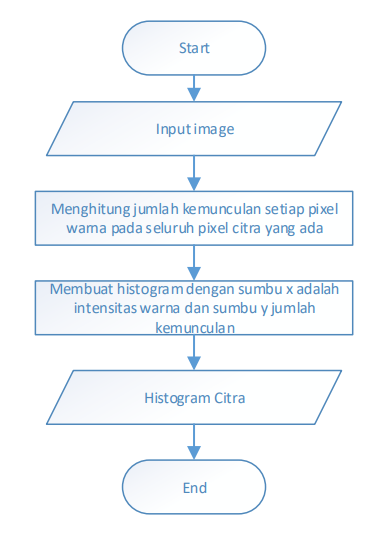

Output :

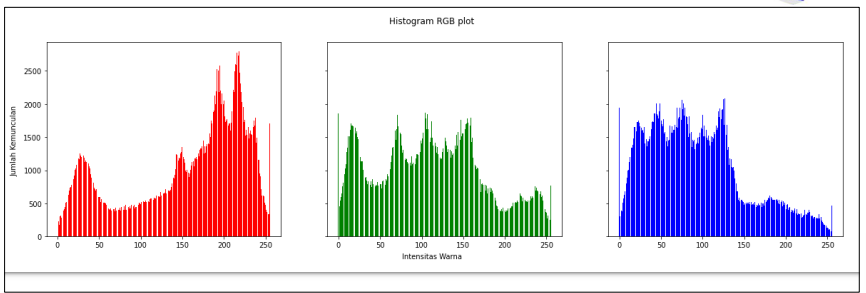



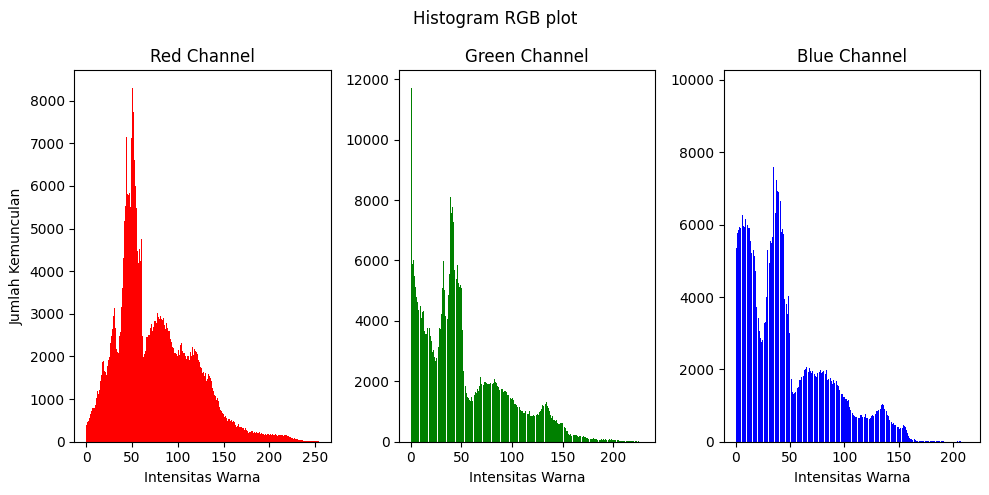

In [3]:
# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/gambar1.png')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Split the image into its R, G, and B channels
r_channel, g_channel, b_channel = cv.split(image_rgb)

# Create histograms for each channel
color = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))
plt.suptitle('Histogram RGB plot')

# Histogram for Red Channel
plt.subplot(1, 3, 1)
plt.hist(r_channel.ravel(), bins=256, color='r')
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Histogram for Green Channel
plt.subplot(1, 3, 2)
plt.hist(g_channel.ravel(), bins=256, color='g')
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')

# Histogram for Blue Channel
plt.subplot(1, 3, 3)
plt.hist(b_channel.ravel(), bins=256, color='b')
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')

# Show the histograms
plt.tight_layout()
plt.show()

# Soal 4
 Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?




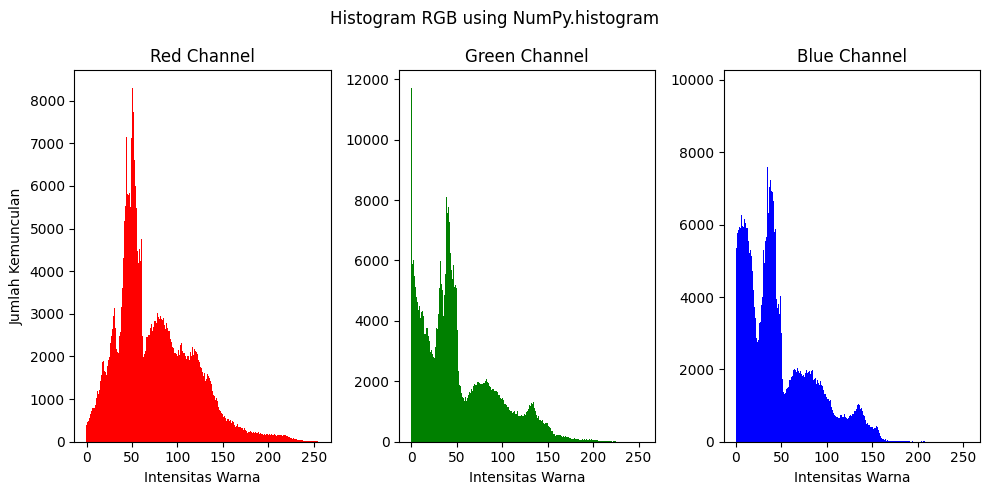

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/gambar1.png')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Split the image into its R, G, and B channels
r_channel, g_channel, b_channel = cv.split(image_rgb)

# Create histograms for each channel using NumPy's histogram
hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=[0, 256])
hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=[0, 256])
hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=[0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))
plt.suptitle('Histogram RGB using NumPy.histogram')

# Histogram for Red Channel
plt.subplot(1, 3, 1)
plt.bar(bins_r[:-1], hist_r, color='r', width=1)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Histogram for Green Channel
plt.subplot(1, 3, 2)
plt.bar(bins_g[:-1], hist_g, color='g', width=1)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')

# Histogram for Blue Channel
plt.subplot(1, 3, 3)
plt.bar(bins_b[:-1], hist_b, color='b', width=1)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')

# Show the histograms
plt.tight_layout()
plt.show()

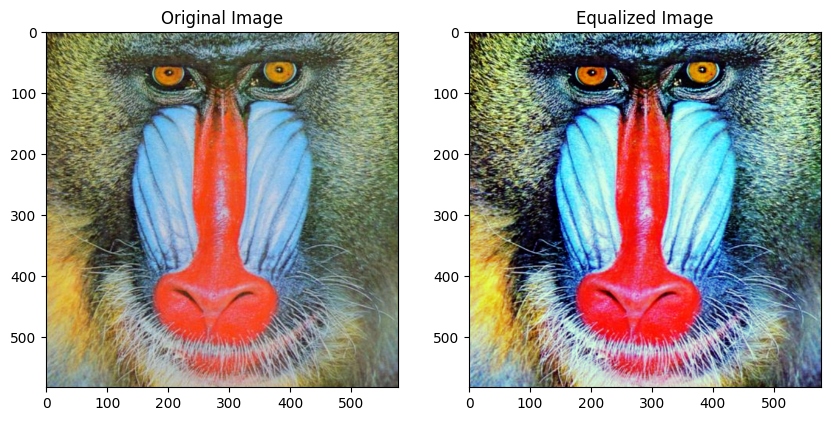

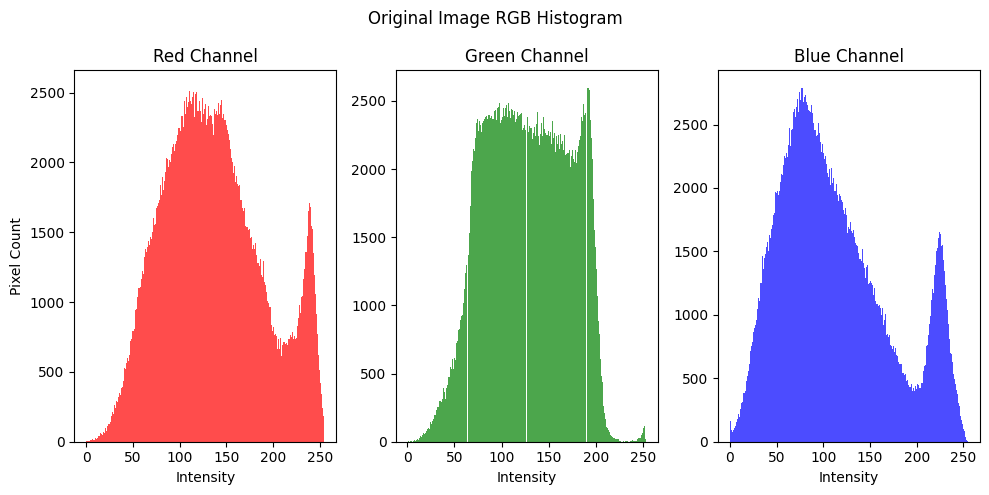

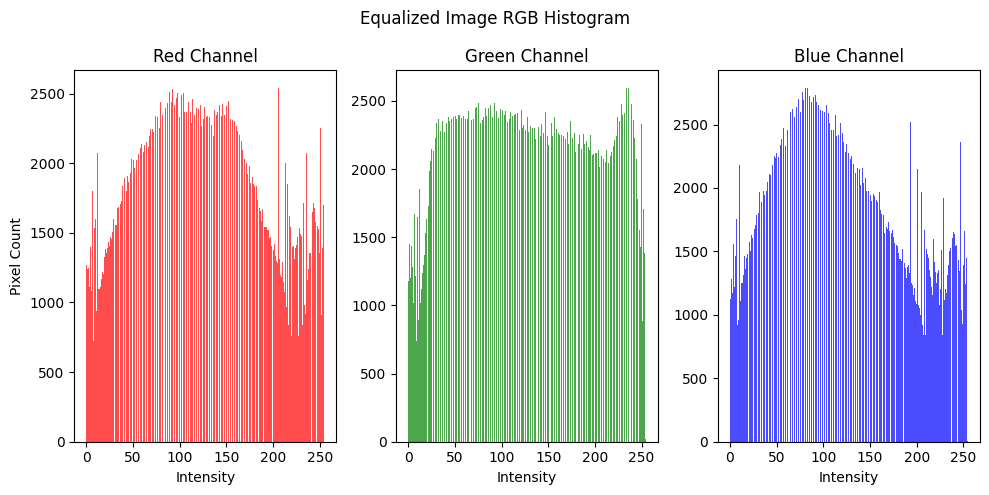

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/PCVK/gambar2.png'  # Assuming the uploaded image is lena_lc.jpg
image = cv.imread(image_path)

# Convert image from BGR to RGB for plotting
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Split the image into RGB channels
r_channel, g_channel, b_channel = cv.split(image_rgb)

# Function to apply histogram equalization to each channel
def equalize_channel(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])

    # Calculate CDF (Cumulative Distribution Function)
    cdf = hist.cumsum()

    # Normalize CDF
    cdf_normalized = cdf * 255 / cdf[-1]

    # Apply the equalization
    equalized_channel = np.interp(channel.flatten(), bins[:-1], cdf_normalized).reshape(channel.shape)

    return equalized_channel.astype(np.uint8)

# Apply equalization to each RGB channel
r_eq = equalize_channel(r_channel)
g_eq = equalize_channel(g_channel)
b_eq = equalize_channel(b_channel)

# Merge the equalized channels back
equalized_image = cv.merge((r_eq, g_eq, b_eq))

# Function to plot histograms of each channel
def plot_histograms(image, title):
    r_channel, g_channel, b_channel = cv.split(image)

    plt.figure(figsize=(10, 5))
    plt.suptitle(title)

    plt.subplot(1, 3, 1)
    plt.hist(r_channel.ravel(), bins=256, color='r', alpha=0.7)
    plt.title('Red Channel')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')

    plt.subplot(1, 3, 2)
    plt.hist(g_channel.ravel(), bins=256, color='g', alpha=0.7)
    plt.title('Green Channel')
    plt.xlabel('Intensity')

    plt.subplot(1, 3, 3)
    plt.hist(b_channel.ravel(), bins=256, color='b', alpha=0.7)
    plt.title('Blue Channel')
    plt.xlabel('Intensity')

    plt.tight_layout()
    plt.show()

# Plot original image and equalized image side by side
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Equalized Image')

plt.show()

# Plot histograms before and after equalization
plot_histograms(image_rgb, 'Original Image RGB Histogram')
plot_histograms(equalized_image, 'Equalized Image RGB Histogram')
